In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
upload = files.upload()
df = pd.read_csv('/content/finalvahid.csv')

Saving finalvahid.csv to finalvahid.csv


In [ ]:
df.dropna(subset=['filed_year'], inplace=True)
df['filed_year'] = df['filed_year'].astype(int)
df.set_index('filed_year', inplace=True)
df['total_sum'] = df.sum(axis=1)
df.head(20)

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,G60,H01,H02,H03,H04,H05,Y02,Y04,Y10,total_sum
filed_year,,,,,,,,,,,,,,,,,,,,,
1834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1836,7,0,0,0,0,0,1,2,0,1,...,0,0,0,0,0,0,1,0,36,150
1837,23,0,0,1,2,8,1,4,2,1,...,0,1,1,0,0,1,1,0,93,560
1838,48,0,1,5,1,2,0,5,0,4,...,0,1,2,0,0,0,3,0,168,727
1839,41,0,0,3,1,4,0,5,1,2,...,0,0,2,0,0,1,3,0,92,525
1840,36,1,1,4,1,5,3,3,3,5,...,0,0,1,0,1,0,5,0,86,582
1841,32,2,0,6,0,7,2,3,3,1,...,0,0,2,0,0,0,6,0,125,670
1842,47,2,0,1,1,6,3,5,2,4,...,0,2,0,0,0,0,16,0,111,663


# internal combustion engine

In [ ]:
upload = files.upload()
df_Electric_generator = pd.read_stata('/content/3d.dta')

Saving 3d.dta to 3d.dta


In [ ]:
df_Electric_generator.dropna(subset=['filed_year'], inplace=True)
df_Electric_generator['filed_year'] = df_Electric_generator['filed_year'].astype(int)
df_Electric_generator.set_index('filed_year', inplace=True)
df_Electric_generator['total_sum'] = df_Electric_generator.sum(axis=1)
combined_df = df_Electric_generator.join(df, lsuffix='_steam_engine', rsuffix='_original')
ratio_df = pd.DataFrame(combined_df['total_sum_steam_engine'] / combined_df['total_sum_original'], columns=['total_sum_ratio']) * 100

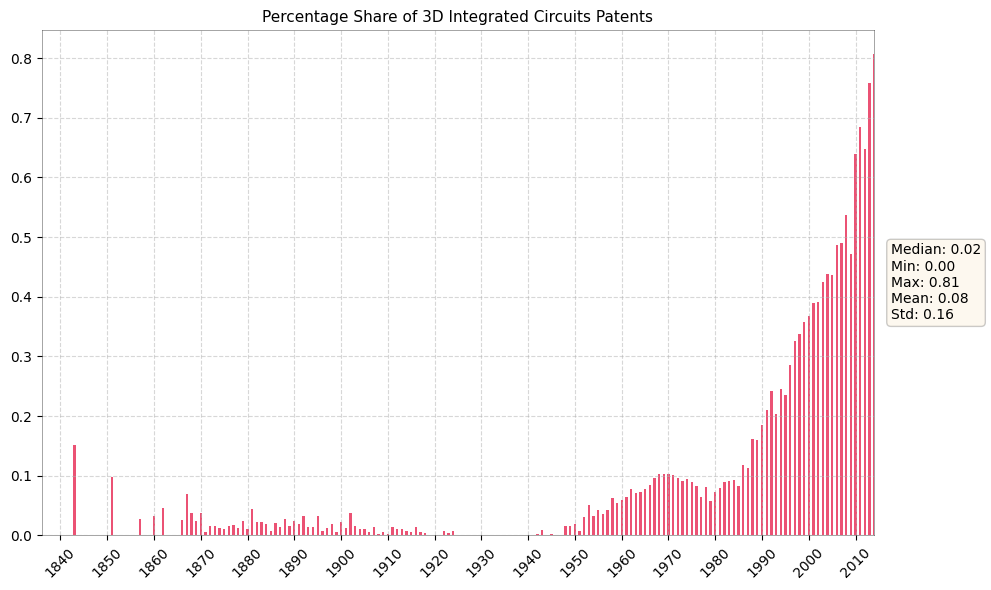

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter the DataFrame to include only the years 1836 to 2014
filtered_ratio_df = ratio_df[(ratio_df.index >= 1836) & (ratio_df.index <= 2014)]

# Customize the x-axis ticks to appear every 10 years starting from 1840 to 2014
tick_positions = range(1840, 2015, 10)

# Generate a random color
random_color = (random.random(), random.random(), random.random())

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total_sum_ratio in the filtered range using the random color
ax.bar(filtered_ratio_df.index, filtered_ratio_df['total_sum_ratio'], color=random_color, width=0.5, alpha=0.8)

# Set x-axis ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=45)  # Rotate x-axis labels for better readability

# Explicitly set the x-axis limits to start at 1836 and end at 2014
plt.xlim(1836, 2014)

# Add y-axis label
plt.title('Percentage Share of 3D Integrated Circuits Patents', fontsize=11)

# Add statistical values below the x-axis with a box
box_props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(1.02, 0.5, f"Median: {filtered_ratio_df['total_sum_ratio'].median():.2f}\n"
                    f"Min: {filtered_ratio_df['total_sum_ratio'].min():.2f}\n"
                    f"Max: {filtered_ratio_df['total_sum_ratio'].max():.2f}\n"
                    f"Mean: {filtered_ratio_df['total_sum_ratio'].mean():.2f}\n"
                    f"Std: {filtered_ratio_df['total_sum_ratio'].std():.2f}",
         transform=ax.transAxes, fontsize=10, va='center', ha='left', bbox=box_props)

# Add a light grid
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='x', linestyle='--', alpha=0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

# Adjust layout to prevent cropping
plt.tight_layout()

# Display the plot
plt.savefig('3d.png', dpi=300)
plt.show()
files.download('3d.png')

# steam engine

In [ ]:
upload = files.upload()
df_steam_engine = pd.read_stata('/content/steam_engine.dta')

Saving steam_engine.dta to steam_engine (2).dta


In [ ]:
df_steam_engine.dropna(subset=['filed_year'], inplace=True)
df_steam_engine['filed_year'] = df_steam_engine['filed_year'].astype(int)
df_steam_engine.set_index('filed_year', inplace=True)
df_steam_engine['total_sum'] = df_steam_engine.sum(axis=1)
combined_df = df_steam_engine.join(df, lsuffix='_steam_engine', rsuffix='_original')
ratio_df = pd.DataFrame(combined_df['total_sum_steam_engine'] / combined_df['total_sum_original'], columns=['total_sum_ratio']) * 100

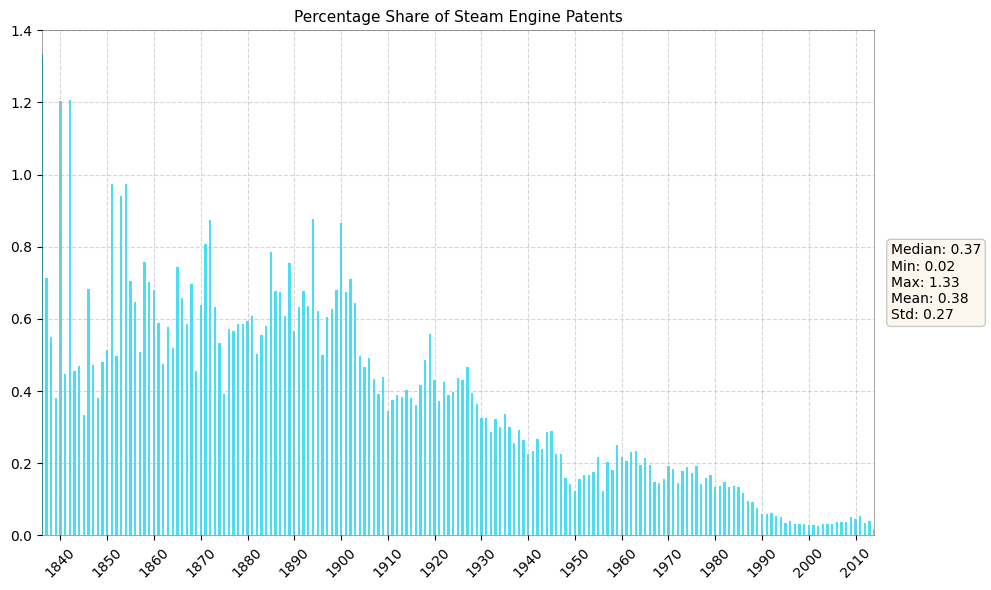

In [ ]:
# Filter the DataFrame to include only the years 1836 to 2014
filtered_ratio_df = ratio_df[(ratio_df.index >= 1836) & (ratio_df.index <= 2014)]

# Customize the x-axis ticks to appear every 10 years starting from 1840 to 2014
tick_positions = range(1840, 2015, 10)

# Generate a random color
random_color = (random.random(), random.random(), random.random())

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total_sum_ratio in the filtered range using the random color
ax.bar(filtered_ratio_df.index, filtered_ratio_df['total_sum_ratio'], color=random_color, width=0.5, alpha=0.8)

# Set x-axis ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=45)  # Rotate x-axis labels for better readability

# Explicitly set the x-axis limits to start at 1836 and end at 2014
plt.xlim(1836, 2014)

# Add y-axis label
plt.title('Percentage Share of Steam Engine Patents', fontsize=11)

# Add statistical values below the x-axis with a box
box_props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(1.02, 0.5, f"Median: {filtered_ratio_df['total_sum_ratio'].median():.2f}\n"
                    f"Min: {filtered_ratio_df['total_sum_ratio'].min():.2f}\n"
                    f"Max: {filtered_ratio_df['total_sum_ratio'].max():.2f}\n"
                    f"Mean: {filtered_ratio_df['total_sum_ratio'].mean():.2f}\n"
                    f"Std: {filtered_ratio_df['total_sum_ratio'].std():.2f}",
         transform=ax.transAxes, fontsize=10, va='center', ha='left', bbox=box_props)

# Add a light grid
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='x', linestyle='--', alpha=0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

# Adjust layout to prevent cropping
plt.tight_layout()

# Display the plot
#plt.savefig('steam_engine.png', dpi=300)
plt.show()
#files.download('steam_engine.png')